In [5]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#### 다중 클래스 분류용 선형 모델

- 로지스틱 회귀를 제외하고 많은 선형 분류 모델은 이진 분류만을 지원

- 이진 분류 알고리즘을 다중 분류로 확장하는 방법은 일대다 방법. 각 클래스의 수만큼 이진 분류 모델을 만들고 가장 높은 점수를 내는 클래스를 예측값으로 선택

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


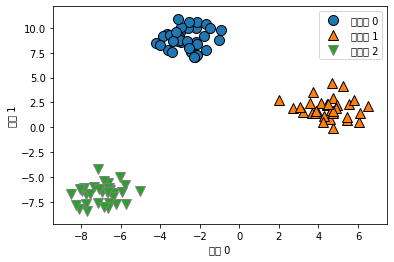

In [3]:
X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2'])

In [4]:
linear_svm = LinearSVC().fit(X, y)
print(f'계수 배열의 크기 : {linear_svm.coef_.shape}')
print(f'절편 배열의 크기 : {linear_svm.intercept_.shape}')

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\m

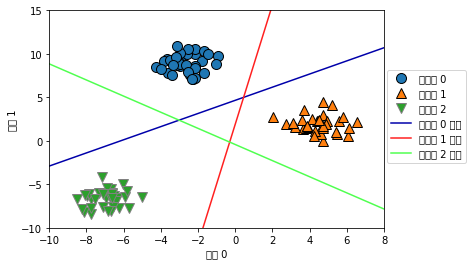

In [6]:
## 세 개의 일대다 분류기가 만든 결정 경계

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\m

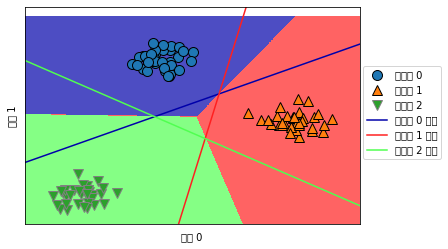

In [7]:
## 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

#### 장단점과 매개변수
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha, 분류 모델에서는 C

- alpha 값이 클수록, C값이 작을수록 모델이 단순해진다.
- 특히 회귀 모델에서 매개변수를 조정하는 것이 중요하며 보통 로그 스케일로 최적치를 정한다. (0.01, 0.1, 1처럼 자릿수가 바뀌도록 10배씩 변경)
- 중요한 특성이 많지 않은 경우는 L1 규제를, 그렇지 않으면 기본적으로 L2 규제를 사용해야 한다.
- 선형 모델은 학습 속도와 예측이 빠른 장점. 또한 공식을 이용해 예측이 어떻게 이루어지는지 비교적 쉽게 이해할 수 있다는 장점이 있다.
- 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 있는데 이것은 다중공선성이 존재할 때 그럴 수 있다.